In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df1 = pd.read_csv("Portfolio_data.csv")
df1

,Loan Number,Due Date,State,DOB,Loan Amount
0,1003431,2022-10-31,KARNATAKA,1987-02-09 00:00:00,240000.0
1,1004356,2022-10-31,MAHARASHTRA,1994-05-23 00:00:00,56000.0
2,1004464,2022-11-01,UTTAR PRADESH,1996-12-01 00:00:00,50000.0
3,1004626,2022-11-01,KERALA,1995-07-14 00:00:00,63000.0
4,1005011,2022-11-01,MAHARASHTRA,1994-05-30 00:00:00,50000.0
...,...,...,...,...,...
15957,901214,2022-11-29,ANDHRA PRADESH,1989-06-01 00:00:00,83000.0
15958,901226,2022-11-29,UTTAR PRADESH,1984-08-24 00:00:00,84000.0
15959,902041,2022-11-29,GUJARAT,1988-08-21 00:00:00,80000.0
15960,905612,2022-11-29,MAHARASHTRA,1990-07-09 00:00:00,75000.0


In [3]:
df = pd.read_csv("CommunicationHistory.csv")
df

,Loan Number,Campaign ID,Communication Operator Message ID,Call time,Status
0,16748071234,161584404,21a1f7b1ce4d23d558e300626d5016c2,2022-12-02T02:59:40.973Z,completed
1,16734601234,161584404,edecb5cd796826ef8bcde2f4814f16c2,2022-12-02T03:57:51.335Z,completed
2,1631580,161307935,6a79ed24fa727ae9341f53a9df8816c2,2022-12-02T04:34:26.950Z,completed
3,1631580,161307935,ce45ac657c26d5d10e6d1eb4aacc16c2,2022-12-02T04:34:57.213Z,completed
4,1631580,161307935,6c864d7097f2df3eed4900ea892816c2,2022-12-02T04:36:21.594Z,completed
...,...,...,...,...,...
70602,1505359,173536581,e00ab7123a2ec89f4ef8c752973016c7,2022-12-07T17:57:44.814Z,completed
70603,1657882,173536581,4ad88b1f7ec7346435db29b5529916c7,2022-12-07T18:38:06.691Z,completed
70604,1517330,173536581,41aab721f9e38552d5b688d8142816c8,2022-12-07T20:03:30.600Z,completed
70605,1769119,172948100,c455574ddfbf0fcdec9399bf5b6b16c8,2022-12-07T20:05:00.526Z,completed


In [4]:
df.columns

Index(['Loan Number', 'Campaign ID', 'Communication Operator Message ID',
       'Call time', 'Status'],
      dtype='object')

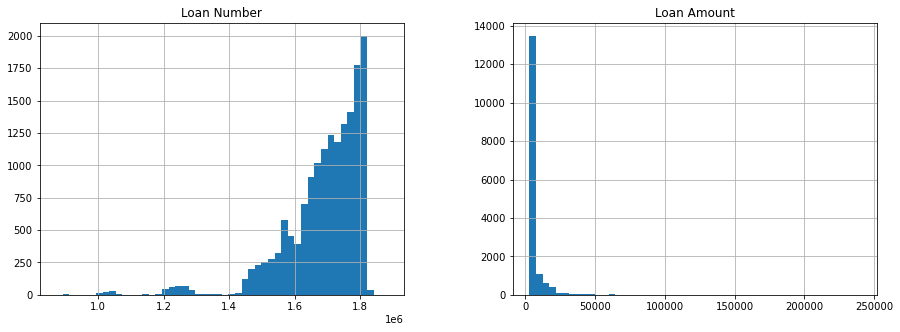

In [5]:
df1.hist(figsize = (15,5),bins = 50)
plt.show()

In [6]:
# 1) Distribution of loans across different states

In [7]:
state_loan = df1.groupby('State')['Loan Amount'].sum()

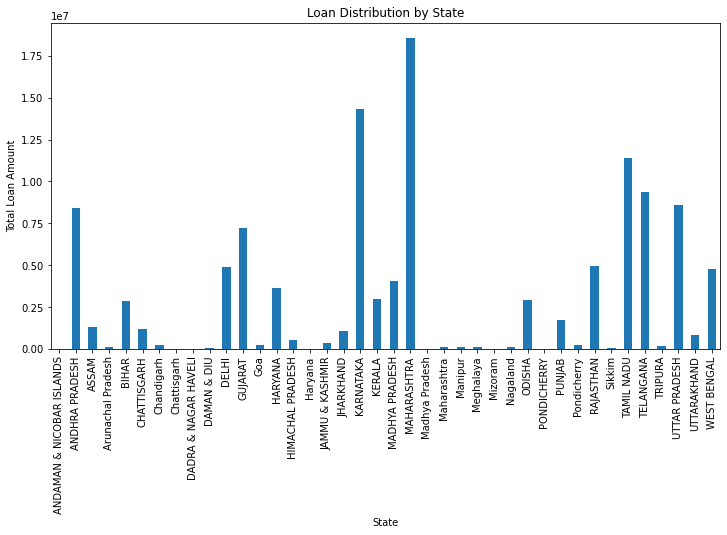

In [8]:
state_loan.plot(kind='bar', figsize=(12,6))
plt.title('Loan Distribution by State')
plt.xlabel('State')
plt.ylabel('Total Loan Amount')
plt.show()

In [9]:
#2) Distribution of loans across different amounts

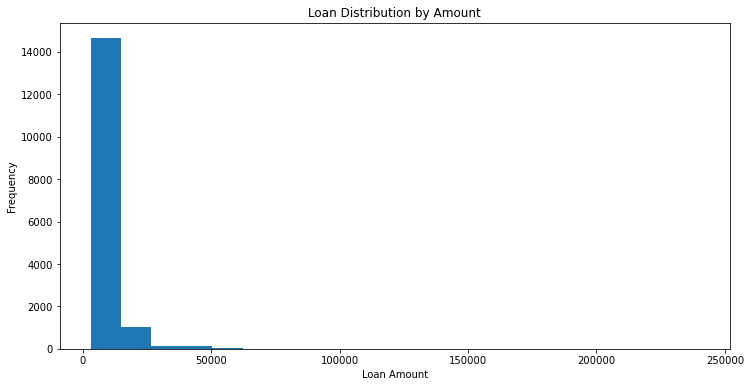

In [10]:
df1['Loan Amount'].plot(kind='hist', bins=20, figsize=(12,6))
plt.title('Loan Distribution by Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

In [11]:
x = df1['Loan Amount'].value_counts()
x.head(20)

5000.0     6757
7000.0     3474
5017.0     1050
10000.0     643
6000.0      348
5020.0      337
15000.0     273
7028.0      243
20000.0     206
4000.0      152
3000.0      139
5100.0      124
10040.0     111
16000.0      95
18000.0      88
8000.0       77
17000.0      71
12000.0      62
19000.0      57
25000.0      56
Name: Loan Amount, dtype: int64

In [12]:
#3)Distribution of customers by age

In [13]:
dob = dt.datetime.strptime(df1.loc[0, 'DOB'], '%Y-%m-%d %H:%M:%S')
df1['DOB'] = (dt.datetime.today() - dob).days // 365

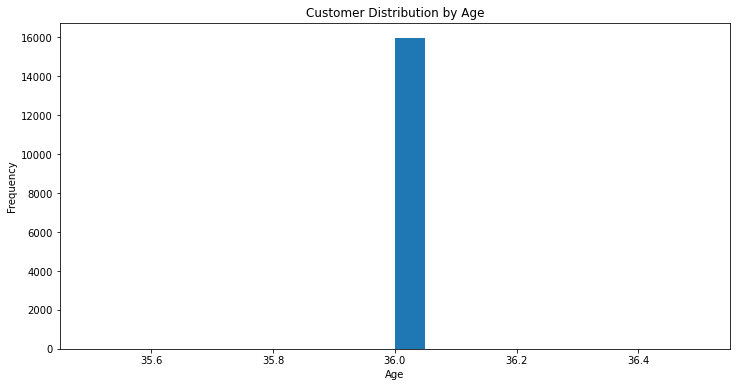

In [14]:
df1['DOB'].plot(kind='hist', bins=20, figsize=(12,6))
plt.title('Customer Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [15]:
y = df1['DOB'].value_counts()
y

36    15962
Name: DOB, dtype: int64

In [16]:
#4) Distribution of loans by due dates

In [17]:
df1['Due Date'] = pd.to_datetime(df1['Due Date'])

In [18]:
loans_by_due_date = df1.groupby('Due Date').size().reset_index(name='Loan Count')

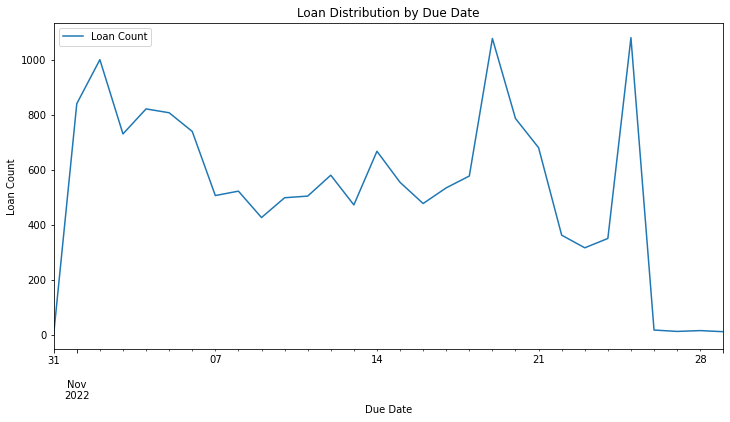

In [19]:
loans_by_due_date.plot(x='Due Date', y='Loan Count', figsize=(12,6))
plt.title('Loan Distribution by Due Date')
plt.xlabel('Due Date')
plt.ylabel('Loan Count')
plt.show()

In [20]:
#1) Unique number of customers contacted every day - only completed calls are to be considered - How many unique 
#borrowers did we contact on day 1, day 2 etc.

In [21]:
completed_calls = df[df['Status'] == 'completed']

In [22]:
completed_calls['Call time'] = pd.to_datetime(completed_calls['Call time'])

C:\Users\sneha\AppData\Local\Temp\ipykernel_16564\449599969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_calls['Call time'] = pd.to_datetime(completed_calls['Call time'])


In [23]:
unique_borrowers_by_date = completed_calls.groupby(completed_calls['Call time'].dt.date)['Loan Number'].nunique()

In [24]:
print(unique_borrowers_by_date)

Call time
2022-12-02    7845
2022-12-03    6929
2022-12-04    6103
2022-12-05    6284
2022-12-06    5665
2022-12-07    4261
Name: Loan Number, dtype: int64


In [25]:
#2)Number of customers not contacted on every day. How many borrowers are not contacted on day 1, day 2 etc.

In [26]:
all_borrowers = completed_calls['Loan Number'].unique()
not_contacted_by_date = []
for date in unique_borrowers_by_date.index:
    contacts_on_date = unique_borrowers_by_date.loc[date]
    not_contacted = len(all_borrowers) - contacts_on_date
    not_contacted_by_date.append(not_contacted)
print(not_contacted_by_date)


[3372, 4288, 5114, 4933, 5552, 6956]


In [27]:
#4)Who are the customers who have been contacted the most

In [28]:
calls_per_borrower = completed_calls.groupby('Loan Number')['Call time'].count()

In [29]:
sorted_borrowers = calls_per_borrower.sort_values(ascending=False)
sorted_borrowers.head(10)

Loan Number
1659081    38
1580447    30
1564892    28
1542440    28
1759399    27
1817574    27
1625201    26
1691978    26
1814726    26
1637862    26
Name: Call time, dtype: int64

In [30]:
#5) Who are the customers who have been contacted the least

In [31]:
sorted_borrowers_leastcalled = calls_per_borrower.sort_values()
sorted_borrowers_leastcalled.head(10)

Loan Number
16748071234    1
1754354        1
1754295        1
1611769        1
1611817        1
1754215        1
1754097        1
1753979        1
1612943        1
1753730        1
Name: Call time, dtype: int64

In [32]:
#6)How many customers have never been reached out?

In [33]:
completed_loan_numbers = df[df['Status'] == 'completed']['Loan Number'].unique()

In [34]:
all_loan_numbers = df['Loan Number'].unique()

In [35]:
not_contacted_loan_numbers = list(set(all_loan_numbers) - set(completed_loan_numbers))

In [36]:
print(not_contacted_loan_numbers)

[1519456, 1565907, 1718725]


In [37]:
#7) Distribution of calls by states.

In [38]:
merged_data = pd.merge(df1, df, on='Loan Number')

In [47]:
calls_statwise = merged_data.groupby('State')['Call time'].sum()

In [49]:
sorted_campaign = calls_statwise.sort_values(ascending=False)
print(sorted_campaign)

State
Nagaland                     2022-12-07T06:52:20.650Z2022-12-07T14:31:23.99...
TELANGANA                    2022-12-04T06:31:08.982Z2022-12-04T09:27:59.66...
Chandigarh                   2022-12-03T13:21:34.536Z2022-12-02T08:42:46.73...
KARNATAKA                    2022-12-03T13:16:04.150Z2022-12-04T05:50:06.50...
JHARKHAND                    2022-12-03T12:49:14.978Z2022-12-04T06:52:10.80...
Meghalaya                    2022-12-03T12:22:05.081Z2022-12-04T06:52:21.87...
ANDAMAN & NICOBAR ISLANDS    2022-12-03T10:23:39.270Z2022-12-03T13:35:28.85...
UTTAR PRADESH                2022-12-03T05:58:34.949Z2022-12-03T09:47:08.34...
MAHARASHTRA                  2022-12-02T13:26:29.198Z2022-12-04T14:09:47.84...
Chattisgarh                  2022-12-02T13:13:52.952Z2022-12-03T10:11:51.02...
WEST BENGAL                  2022-12-02T12:20:08.813Z2022-12-03T14:02:19.63...
Manipur                      2022-12-02T12:02:35.864Z2022-12-02T09:10:21.74...
UTTARAKHAND                  2022-12-02T10:55:

In [40]:
# 8) Distribution of calls by campaign ids

In [41]:
calls_by_campaign = df.groupby('Campaign ID')['Call time'].count()
sorted_campaigns = calls_by_campaign.sort_values(ascending=False)
print(sorted_campaigns)

Campaign ID
164168595    6905
164661895    6413
165448984    3736
170181308    3637
168801291    3545
167104482    3416
166203288    3391
166790104    3286
170740199    3280
168389540    3106
171446618    3045
169508126    3014
172117487    2973
172948100    2802
167820924    2692
165448976    1684
173536581    1632
166203285    1507
166790108    1467
172503470    1184
167104488    1068
168389543     945
168801293     878
167820915     797
170181312     694
169508122     660
170740200     554
171446611     501
172117491     495
172503471     486
173536583     466
172948097     316
169508129      11
167104481       5
156594506       4
161307935       4
161584404       3
172503474       2
161310463       2
135474249       1
Name: Call time, dtype: int64


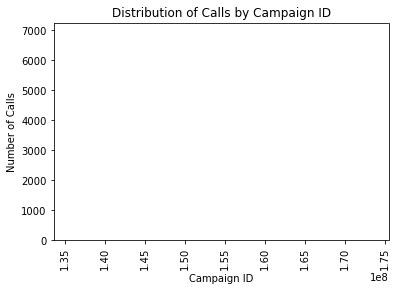

In [42]:
fig, ax = plt.subplots()
ax.bar(sorted_campaigns.index, sorted_campaigns.values)

# Set the chart title and axis labels
ax.set_title('Distribution of Calls by Campaign ID')
ax.set_xlabel('Campaign ID')
ax.set_ylabel('Number of Calls')

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# Show the chart
plt.show()

In [43]:
#Unique number of customers by campaign ID

In [44]:
unique_customers_by_campaign = df.groupby('Campaign ID')['Loan Number'].nunique()
sorted_campaigns = unique_customers_by_campaign.sort_values(ascending=False)
print(sorted_campaigns)

Campaign ID
164168595    6306
164661895    5833
165448984    3430
170181308    3419
168801291    3353
167104482    3227
166203288    3189
170740199    3128
166790104    3070
168389540    2925
171446618    2902
169508126    2878
172117487    2789
172948100    2663
167820924    2578
165448976    1576
173536581    1572
166203285    1450
166790108    1408
172503470    1134
167104488    1019
168389543     877
168801293     841
167820915     747
170181312     654
169508122     629
170740200     529
171446611     472
172503471     465
172117491     463
173536583     433
172948097     308
169508129      11
167104481       5
161584404       3
156594506       2
172503474       2
161310463       2
161307935       1
135474249       1
Name: Loan Number, dtype: int64
